# LaRoSeDa Dataset Exploration

This notebook explores the LaRoSeDa Romanian e-commerce review dataset.

**Contents:**
1. Load and inspect dataset
2. Basic statistics
3. Class distribution
4. Text length analysis
5. Word frequency analysis
6. Sample reviews

In [1]:
import sys
from pathlib import Path

# Add src to path
sys.path.insert(0, str(Path.cwd().parent / 'src'))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from huggingface_hub import hf_hub_download

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

%matplotlib inline

## 1. Load Dataset

In [2]:
# Download dataset from HuggingFace
train_file = hf_hub_download(
    repo_id="universityofbucharest/laroseda",
    filename="laroseda/train/0000.parquet",
    repo_type="dataset",
    revision="refs/convert/parquet"
)

test_file = hf_hub_download(
    repo_id="universityofbucharest/laroseda",
    filename="laroseda/test/0000.parquet",
    repo_type="dataset",
    revision="refs/convert/parquet"
)

# Load data
train_df = pd.read_parquet(train_file)
test_df = pd.read_parquet(test_file)

print(f"Train set: {len(train_df)} samples")
print(f"Test set: {len(test_df)} samples")
print(f"Total: {len(train_df) + len(test_df)} samples")

Train set: 12000 samples
Test set: 3000 samples
Total: 15000 samples


## 2. Inspect Data

In [3]:
# Show first few rows
print("First 5 training samples:")
train_df.head()

First 5 training samples:


,index,title,content,starRating
0,11262,Foarte slab,ca aspect este foarte frumoasa dar cine vrea s...,1
1,3890,Foarte multumit,se incarca repede si tine 3 incarcari complete...,5
2,9413,Țeapa de zile mari!!!,in primul rand nu este de stica dupa cum spune...,1
3,9350,Nu merita cumparate,nu merita cumparate... sunt create cu limitare...,1
4,7126,Recomand,un ceas excelent. face cam tot ce ai nevoie ca...,5


In [4]:
# Column info
print("\nColumn information:")
train_df.info()


Column information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       12000 non-null  object
 1   title       12000 non-null  object
 2   content     12000 non-null  object
 3   starRating  12000 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 375.1+ KB


In [5]:
# Check for missing values
print("\nMissing values:")
print(train_df.isnull().sum())


Missing values:
index         0
title         0
content       0
starRating    0
dtype: int64


## 3. Class Distribution

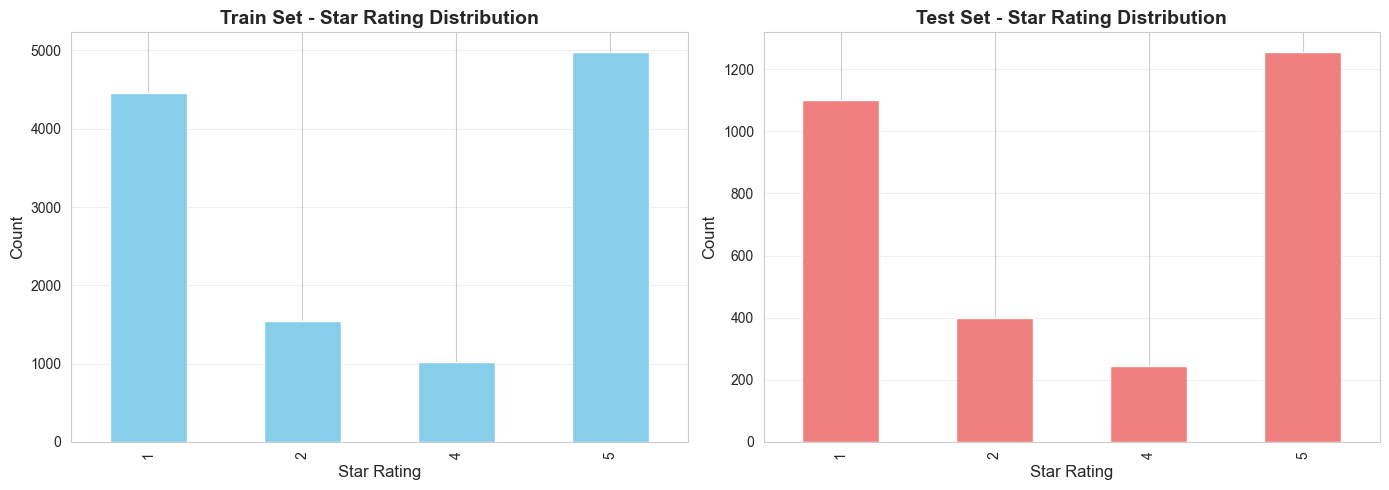


Train set star rating distribution:
starRating
1    4459
2    1541
4    1018
5    4982
Name: count, dtype: int64

Test set star rating distribution:
starRating
1    1102
2     398
4     244
5    1256
Name: count, dtype: int64


In [6]:
# Star rating distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Train set
train_df['starRating'].value_counts().sort_index().plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Train Set - Star Rating Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Star Rating', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)

# Test set
test_df['starRating'].value_counts().sort_index().plot(kind='bar', ax=axes[1], color='lightcoral')
axes[1].set_title('Test Set - Star Rating Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Star Rating', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\nTrain set star rating distribution:")
print(train_df['starRating'].value_counts().sort_index())
print("\nTest set star rating distribution:")
print(test_df['starRating'].value_counts().sort_index())

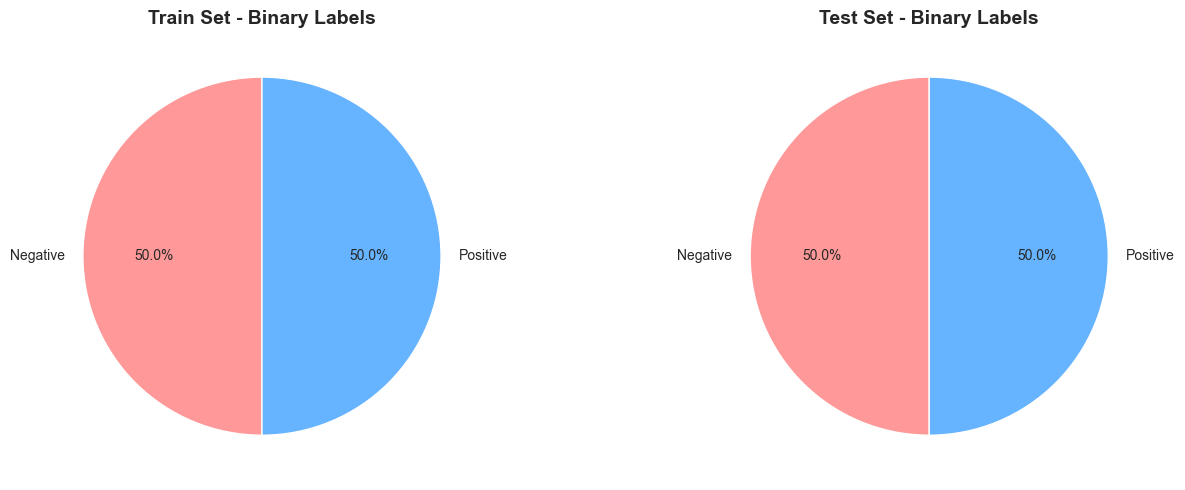


Binary label distribution:
Train: {'Negative': 6000, 'Positive': 6000}
Test: {'Negative': 1500, 'Positive': 1500}


In [7]:
# Binary classification distribution (Negative: 1-2 stars, Positive: 3-5 stars)
train_df['binary_label'] = train_df['starRating'].apply(lambda x: 'Negative' if x in [1, 2] else 'Positive')
test_df['binary_label'] = test_df['starRating'].apply(lambda x: 'Negative' if x in [1, 2] else 'Positive')

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Train set
train_counts = train_df['binary_label'].value_counts()
axes[0].pie(train_counts, labels=train_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'])
axes[0].set_title('Train Set - Binary Labels', fontsize=14, fontweight='bold')

# Test set
test_counts = test_df['binary_label'].value_counts()
axes[1].pie(test_counts, labels=test_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'])
axes[1].set_title('Test Set - Binary Labels', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\nBinary label distribution:")
print("Train:", dict(train_counts))
print("Test:", dict(test_counts))

## 4. Text Length Analysis

In [8]:
# Create combined text column
train_df['full_text'] = train_df['title'] + ' ' + train_df['content']
test_df['full_text'] = test_df['title'] + ' ' + test_df['content']

# Calculate text lengths
train_df['text_length'] = train_df['full_text'].str.len()
test_df['text_length'] = test_df['full_text'].str.len()

train_df['word_count'] = train_df['full_text'].str.split().str.len()
test_df['word_count'] = test_df['full_text'].str.split().str.len()

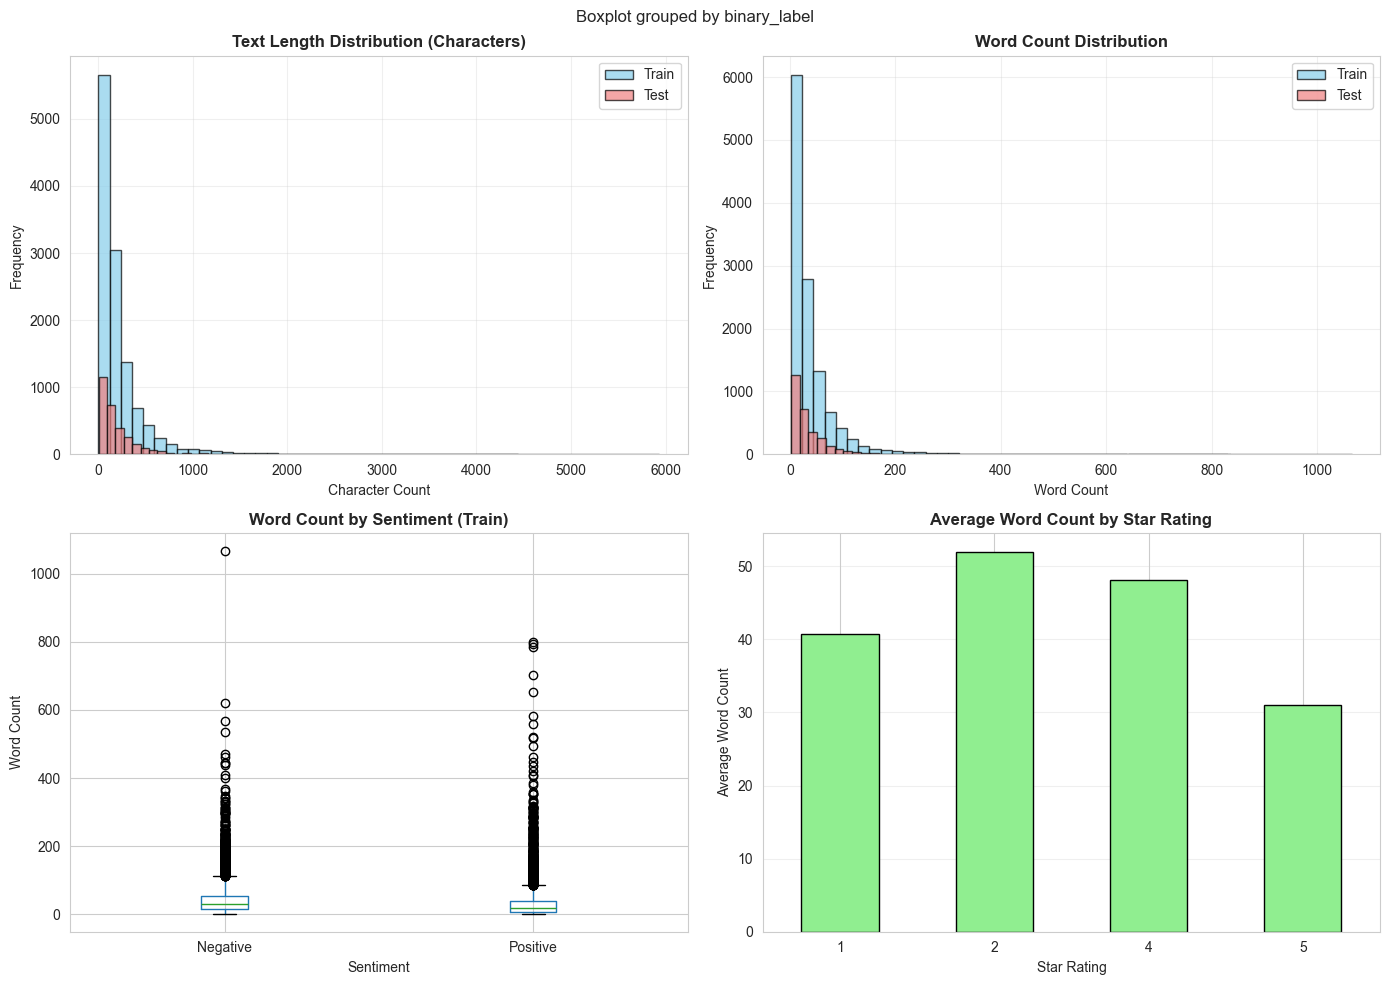

In [9]:
# Text length statistics
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Character length distribution
axes[0, 0].hist(train_df['text_length'], bins=50, alpha=0.7, label='Train', color='skyblue', edgecolor='black')
axes[0, 0].hist(test_df['text_length'], bins=50, alpha=0.7, label='Test', color='lightcoral', edgecolor='black')
axes[0, 0].set_title('Text Length Distribution (Characters)', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Character Count', fontsize=10)
axes[0, 0].set_ylabel('Frequency', fontsize=10)
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Word count distribution
axes[0, 1].hist(train_df['word_count'], bins=50, alpha=0.7, label='Train', color='skyblue', edgecolor='black')
axes[0, 1].hist(test_df['word_count'], bins=50, alpha=0.7, label='Test', color='lightcoral', edgecolor='black')
axes[0, 1].set_title('Word Count Distribution', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Word Count', fontsize=10)
axes[0, 1].set_ylabel('Frequency', fontsize=10)
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Box plot by sentiment
train_df.boxplot(column='word_count', by='binary_label', ax=axes[1, 0])
axes[1, 0].set_title('Word Count by Sentiment (Train)', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Sentiment', fontsize=10)
axes[1, 0].set_ylabel('Word Count', fontsize=10)
plt.sca(axes[1, 0])
plt.xticks(rotation=0)

# Average word count by star rating
avg_words = train_df.groupby('starRating')['word_count'].mean()
avg_words.plot(kind='bar', ax=axes[1, 1], color='lightgreen', edgecolor='black')
axes[1, 1].set_title('Average Word Count by Star Rating', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Star Rating', fontsize=10)
axes[1, 1].set_ylabel('Average Word Count', fontsize=10)
axes[1, 1].grid(axis='y', alpha=0.3)
plt.sca(axes[1, 1])
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

In [10]:
# Summary statistics
print("\nText Length Statistics (Train Set):")
print("="*60)
print(f"Character count - Mean: {train_df['text_length'].mean():.1f}, Median: {train_df['text_length'].median():.1f}")
print(f"Character count - Min: {train_df['text_length'].min()}, Max: {train_df['text_length'].max()}")
print(f"Word count - Mean: {train_df['word_count'].mean():.1f}, Median: {train_df['word_count'].median():.1f}")
print(f"Word count - Min: {train_df['word_count'].min()}, Max: {train_df['word_count'].max()}")


Text Length Statistics (Train Set):
Character count - Mean: 221.1, Median: 133.0
Character count - Min: 5, Max: 5933
Word count - Mean: 38.7, Median: 23.0
Word count - Min: 2, Max: 1066


## 5. Word Frequency Analysis

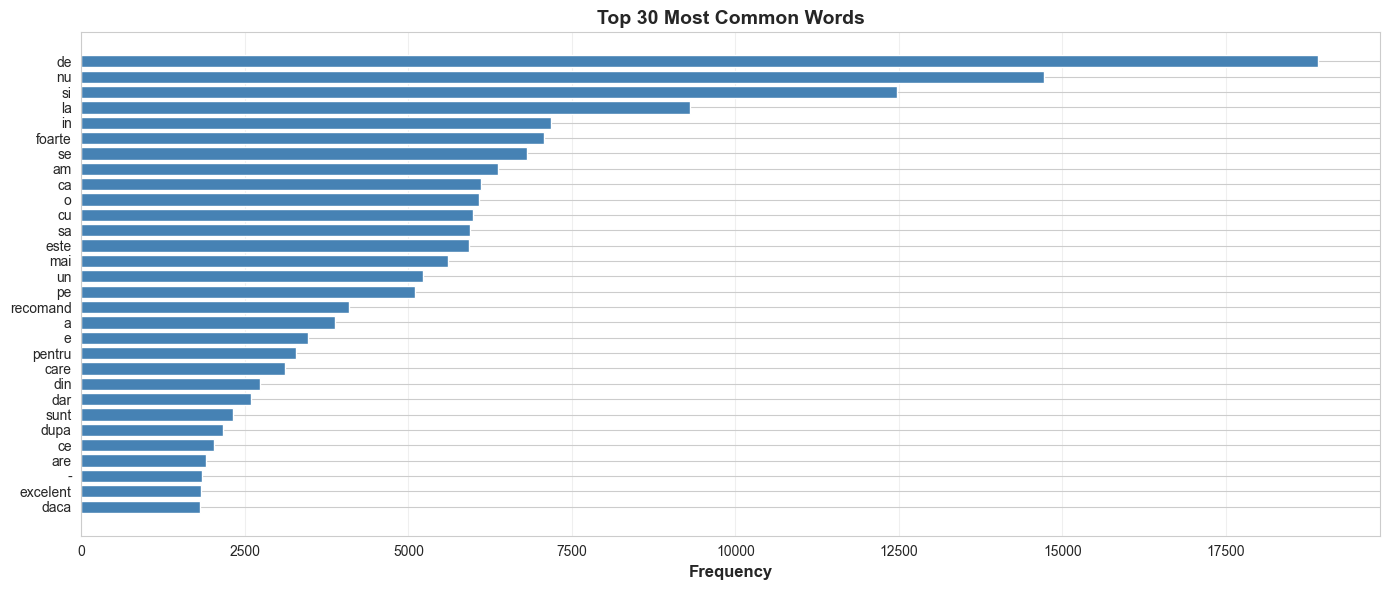


Top 10 most common words:
de                  :  18913
nu                  :  14715
si                  :  12475
la                  :   9313
in                  :   7187
foarte              :   7077
se                  :   6815
am                  :   6369
ca                  :   6116
o                   :   6077


In [11]:
# Get all words
all_words = ' '.join(train_df['full_text'].str.lower()).split()
word_freq = Counter(all_words)

# Top 30 most common words
top_words = word_freq.most_common(30)
words, counts = zip(*top_words)

plt.figure(figsize=(14, 6))
plt.barh(range(len(words)), counts, color='steelblue')
plt.yticks(range(len(words)), words)
plt.xlabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Top 30 Most Common Words', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nTop 10 most common words:")
for word, count in top_words[:10]:
    print(f"{word:20s}: {count:6d}")

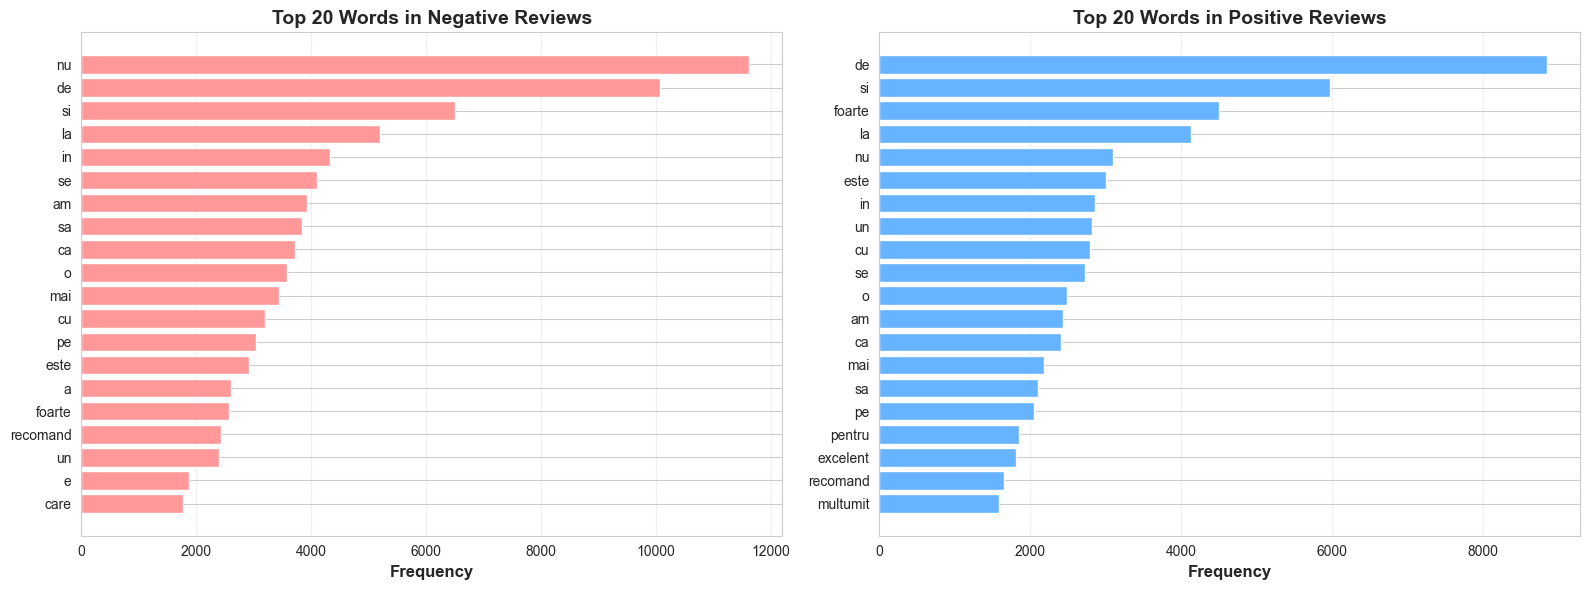

In [12]:
# Word frequency by sentiment
negative_words = ' '.join(train_df[train_df['binary_label'] == 'Negative']['full_text'].str.lower()).split()
positive_words = ' '.join(train_df[train_df['binary_label'] == 'Positive']['full_text'].str.lower()).split()

negative_freq = Counter(negative_words)
positive_freq = Counter(positive_words)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Negative reviews
neg_top = negative_freq.most_common(20)
words, counts = zip(*neg_top)
axes[0].barh(range(len(words)), counts, color='#ff9999')
axes[0].set_yticks(range(len(words)))
axes[0].set_yticklabels(words)
axes[0].set_xlabel('Frequency', fontsize=12, fontweight='bold')
axes[0].set_title('Top 20 Words in Negative Reviews', fontsize=14, fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(axis='x', alpha=0.3)

# Positive reviews
pos_top = positive_freq.most_common(20)
words, counts = zip(*pos_top)
axes[1].barh(range(len(words)), counts, color='#66b3ff')
axes[1].set_yticks(range(len(words)))
axes[1].set_yticklabels(words)
axes[1].set_xlabel('Frequency', fontsize=12, fontweight='bold')
axes[1].set_title('Top 20 Words in Positive Reviews', fontsize=14, fontweight='bold')
axes[1].invert_yaxis()
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Sample Reviews

In [13]:
# Show sample reviews for each star rating
print("\nSample Reviews by Star Rating:")
print("="*80)

for rating in sorted(train_df['starRating'].unique()):
    print(f"\n{rating}-Star Reviews:")
    print("-"*80)
    samples = train_df[train_df['starRating'] == rating].sample(min(2, len(train_df[train_df['starRating'] == rating])))
    for idx, row in samples.iterrows():
        print(f"\nTitle: {row['title']}")
        print(f"Content: {row['content'][:200]}..." if len(row['content']) > 200 else f"Content: {row['content']}")
        print()


Sample Reviews by Star Rating:

1-Star Reviews:
--------------------------------------------------------------------------------

Title: Foarte slab
Content: nu va luati nu merge cand suna cineva nu merge sa raspunzi nu merge sa intri in internet (facebook, twiter etc)


Title: Foarte slab. Nu recomand
Content: are un singur buton, nici nu sti cand il inchizi sau cd re apelezi. nu are butoane de volum, se aude prost si e cam deranjant la ureche.    se aud zgomotele de fundal, pe strada nu poti sa il folosest...


2-Star Reviews:
--------------------------------------------------------------------------------

Title: Slab
Content: cardul s-a blocat in adaptor la prima utilizare si nu mai poate fi extras! deci poate fi utilizat doar in formatul sdcard! dezamagitor!


Title: Nerecomandat
Content: se incarca ok dar nu este detectat de itunes, pentru transferul datelor folosesc alt cablu. am ios 8.


4-Star Reviews:
--------------------------------------------------------------------------

## Summary

This notebook explored the LaRoSeDa dataset:

1. **Dataset Size**: 12,000 train / 3,000 test samples
2. **Class Distribution**: Binary classification (Negative: 1-2 stars, Positive: 3-5 stars)
3. **Text Length**: Varies widely, with average around 50-100 words per review
4. **Language**: Romanian e-commerce product reviews
5. **Word Patterns**: Different frequent words appear in positive vs negative reviews

The dataset is suitable for binary sentiment classification with clear positive/negative signals.